In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pymysql
import sys
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import json

database information

In [2]:
# USER = "group13"
# PASSWORD = "123456789"
# HOST = "dublinbikegroup13.c1msfserw61n.us-east-1.rds.amazonaws.com"
# PORT = 3306
# DATABASE = "dbbike13"

HOST = "127.0.0.1"
USER = "root"
PORT = 3306
DATABASE = "dbbike13"
PASSWORD = "qweqweqwe"

connect to database

In [3]:
try:
    engine = create_engine("mysql+pymysql://{}:{}@{}:{}/{}".format(USER, PASSWORD, HOST, PORT, DATABASE), echo=True)
    
except Exception as e:
        sys.exit(e)

In [4]:
df_availability = pd.read_sql_table("availability",engine)
df_weather = pd.read_sql_table("weather", engine)

2023-04-20 11:07:57,533 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-04-20 11:07:57,548 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-20 11:07:57,548 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-04-20 11:07:57,548 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-20 11:07:57,557 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-04-20 11:07:57,557 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-20 11:07:57,559 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2023-04-20 11:07:57,559 INFO sqlalchemy.engine.Engine [generated in 0.00101s] {'table_schema': 'dbbike13', 'table_name': 'availability'}
2023-04-20 11:07:57,621 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `availability`
2023-04-20 11:07:57,621 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-04-20 11:07:57,639 INFO sqlalchemy.engine.Engine SELECT availability.number, availability.last_update,

In [5]:
df_availability['datetime_rounded'] = pd.to_datetime(df_availability['last_update']).dt.round('10min')
df_availability

,number,last_update,available_bike_stands,available_bikes,status,datetime_rounded
0,1,2023-03-03 15:16:39,23,8,OPEN,2023-03-03 15:20:00
1,1,2023-03-05 16:03:11,1,29,OPEN,2023-03-05 16:00:00
2,1,2023-03-05 16:08:24,0,30,OPEN,2023-03-05 16:10:00
3,1,2023-03-05 16:49:05,1,29,OPEN,2023-03-05 16:50:00
4,1,2023-03-05 17:11:26,1,29,OPEN,2023-03-05 17:10:00
...,...,...,...,...,...,...
105408,117,2023-04-10 23:01:00,40,0,OPEN,2023-04-10 23:00:00
105409,117,2023-04-10 23:21:08,40,0,OPEN,2023-04-10 23:20:00
105410,117,2023-04-10 23:31:12,40,0,OPEN,2023-04-10 23:30:00
105411,117,2023-04-11 16:58:59,40,0,OPEN,2023-04-11 17:00:00


In [6]:
df_weather['datetime_rounded'] = pd.to_datetime(df_weather['dt']).dt.round('10min')

In [7]:
df_weather

,dt,Clouds,feels_like,humidity,pressure,temp,temp_max,temp_min,sunrise,sunset,visibility,weather_description,weather_main,wind_deg,wind_speed,icon,datetime_rounded
0,2023-03-05 16:41:14,40,279.77,69,1016,282.42,282.80,281.68,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,scattered clouds,Clouds,280,5.14,None,2023-03-05 16:40:00
1,2023-03-05 16:57:03,75,279.55,71,1016,282.08,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None,2023-03-05 17:00:00
2,2023-03-05 17:07:41,75,279.64,71,1015,282.15,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None,2023-03-05 17:10:00
3,2023-03-05 17:15:00,75,279.64,71,1015,282.15,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None,2023-03-05 17:20:00
4,2023-03-05 17:17:09,75,279.03,72,1015,281.98,282.59,280.91,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,280,5.66,None,2023-03-05 17:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2023-04-10 00:46:51,75,283.35,86,1005,283.97,284.68,283.51,2023-04-10 06:37:53,2023-04-10 20:14:39,8000,broken clouds,Clouds,210,7.20,04n,2023-04-10 00:50:00
1187,2023-04-10 22:57:25,40,274.27,80,1007,279.26,280.36,278.51,2023-04-10 06:37:53,2023-04-10 20:14:39,10000,scattered clouds,Clouds,250,9.77,03n,2023-04-10 23:00:00
1188,2023-04-10 23:18:29,40,275.25,81,1007,279.15,279.47,278.51,2023-04-10 06:37:53,2023-04-10 20:14:39,10000,scattered clouds,Clouds,250,6.17,03n,2023-04-10 23:20:00
1189,2023-04-10 23:27:32,40,275.25,81,1007,279.15,279.47,278.51,2023-04-10 06:37:53,2023-04-10 20:14:39,10000,scattered clouds,Clouds,250,6.17,03n,2023-04-10 23:30:00


In [8]:
df_merged = pd.merge(df_availability, df_weather, on='datetime_rounded')

In [9]:
df_merged

,number,last_update,available_bike_stands,available_bikes,status,datetime_rounded,dt,Clouds,feels_like,humidity,...,temp_max,temp_min,sunrise,sunset,visibility,weather_description,weather_main,wind_deg,wind_speed,icon
0,1,2023-03-05 17:11:26,1,29,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
1,3,2023-03-05 17:08:32,1,19,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
2,4,2023-03-05 17:08:57,0,20,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
3,5,2023-03-05 17:13:10,39,1,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
4,6,2023-03-05 17:12:35,3,17,OPEN,2023-03-05 17:10:00,2023-03-05 17:07:41,75,279.64,71,...,282.59,281.25,2023-03-05 07:04:33,2023-03-05 18:09:05,10000,broken clouds,Clouds,270,4.63,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153194,107,2023-03-25 10:05:15,28,12,OPEN,2023-03-25 10:10:00,2023-03-25 10:06:52,75,282.51,78,...,284.03,282.36,2023-03-25 06:16:23,2023-03-25 18:45:47,10000,broken clouds,Clouds,260,7.20,04d
153195,108,2023-03-25 10:05:47,26,9,OPEN,2023-03-25 10:10:00,2023-03-25 10:06:52,75,282.51,78,...,284.03,282.36,2023-03-25 06:16:23,2023-03-25 18:45:47,10000,broken clouds,Clouds,260,7.20,04d
153196,30,2023-03-23 14:54:35,20,0,OPEN,2023-03-23 14:50:00,2023-03-23 14:53:37,40,285.71,61,...,287.25,285.36,2023-03-23 06:21:15,2023-03-23 18:42:11,10000,scattered clouds,Clouds,210,12.86,03d
153197,42,2023-03-23 14:52:36,28,2,OPEN,2023-03-23 14:50:00,2023-03-23 14:53:37,40,285.71,61,...,287.25,285.36,2023-03-23 06:21:15,2023-03-23 18:42:11,10000,scattered clouds,Clouds,210,12.86,03d


In [10]:
df_whole = df_merged[['number', 'datetime_rounded','available_bike_stands','available_bikes','feels_like','humidity','pressure','weather_main',  'wind_speed' ]]

In [11]:
df_whole

,number,datetime_rounded,available_bike_stands,available_bikes,feels_like,humidity,pressure,weather_main,wind_speed
0,1,2023-03-05 17:10:00,1,29,279.64,71,1015,Clouds,4.63
1,3,2023-03-05 17:10:00,1,19,279.64,71,1015,Clouds,4.63
2,4,2023-03-05 17:10:00,0,20,279.64,71,1015,Clouds,4.63
3,5,2023-03-05 17:10:00,39,1,279.64,71,1015,Clouds,4.63
4,6,2023-03-05 17:10:00,3,17,279.64,71,1015,Clouds,4.63
...,...,...,...,...,...,...,...,...,...
153194,107,2023-03-25 10:10:00,28,12,282.51,78,1002,Clouds,7.20
153195,108,2023-03-25 10:10:00,26,9,282.51,78,1002,Clouds,7.20
153196,30,2023-03-23 14:50:00,20,0,285.71,61,987,Clouds,12.86
153197,42,2023-03-23 14:50:00,28,2,285.71,61,987,Clouds,12.86


In [12]:
df_whole.loc[:, 'day_of_week'] = df_whole['datetime_rounded'].dt.dayofweek
df_whole.loc[:, 'hourly'] = df_whole['datetime_rounded'].dt.hour

C:\Users\Guo.000\AppData\Local\Temp\ipykernel_21976\136827754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole.loc[:, 'day_of_week'] = df_whole['datetime_rounded'].dt.dayofweek
C:\Users\Guo.000\AppData\Local\Temp\ipykernel_21976\136827754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole.loc[:, 'hourly'] = df_whole['datetime_rounded'].dt.hour


In [13]:
print(df_whole['weather_main'].unique())

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "weather_main" feature
df_whole.loc[:,'weather_main_value'] = le.fit_transform(df_whole['weather_main'])

print(df_whole['weather_main_value'].unique())

['Clouds' 'Drizzle' 'Rain' 'Clear' 'Snow' 'Mist']
[1 2 4 0 5 3]


C:\Users\Guo.000\AppData\Local\Temp\ipykernel_21976\1776046408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole.loc[:,'weather_main_value'] = le.fit_transform(df_whole['weather_main'])


In [14]:
df_whole['datetime_numeric'] = (df_whole['datetime_rounded'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

C:\Users\Guo.000\AppData\Local\Temp\ipykernel_21976\2278473662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whole['datetime_numeric'] = (df_whole['datetime_rounded'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')


In [15]:
df_whole.columns = df_whole.columns.astype(str)

In [16]:
df_whole

,number,datetime_rounded,available_bike_stands,available_bikes,feels_like,humidity,pressure,weather_main,wind_speed,day_of_week,hourly,weather_main_value,datetime_numeric
0,1,2023-03-05 17:10:00,1,29,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
1,3,2023-03-05 17:10:00,1,19,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
2,4,2023-03-05 17:10:00,0,20,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
3,5,2023-03-05 17:10:00,39,1,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
4,6,2023-03-05 17:10:00,3,17,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153194,107,2023-03-25 10:10:00,28,12,282.51,78,1002,Clouds,7.20,5,10,1,1679739000
153195,108,2023-03-25 10:10:00,26,9,282.51,78,1002,Clouds,7.20,5,10,1,1679739000
153196,30,2023-03-23 14:50:00,20,0,285.71,61,987,Clouds,12.86,3,14,1,1679583000
153197,42,2023-03-23 14:50:00,28,2,285.71,61,987,Clouds,12.86,3,14,1,1679583000


In [17]:
df_train, df_test = train_test_split(df_whole, test_size=0.3)
print("Train set size:", len(df_train))
print("Test set size:", len(df_test))

Train set size: 107239
Test set size: 45960


In [18]:
# Define the input features and target variables
input_features = ['number', 'feels_like', 'weather_main_value', 'wind_speed','humidity',
                  'pressure','day_of_week', 'hourly']

x_train = df_train[input_features]
y_train = df_train[['available_bike_stands', 'available_bikes']]

x_test = df_test[input_features]
y_test = df_test[['available_bike_stands', 'available_bikes']]

In [19]:
# Create a Random Forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=15
                                 ,random_state = 0
                                ,max_depth=27
                                ,max_features=7)

# Fit the model on the training data
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=27, max_features=7, n_estimators=15,
                      random_state=0)

In [20]:
# Make predictions on the test data
y_pred = rf.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print('Mean squared error:', mse)

Mean squared error: 2.125483908453459


0.9784426579233367 29


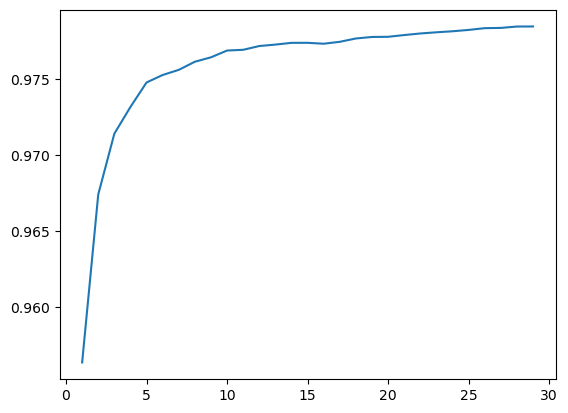

In [21]:
scorel = []
mi = 1
ma = 30
for i in range (mi,ma):
    rfc = RandomForestRegressor(n_estimators=i
                                 ,n_jobs=-1
                                 ,random_state = 0
                                )
    rfc = rfc.fit(x_train,y_train)
    score =rfc.score(x_test,y_test)
#     score = cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+mi)

plt.plot(range(mi,ma),scorel)
plt.show()

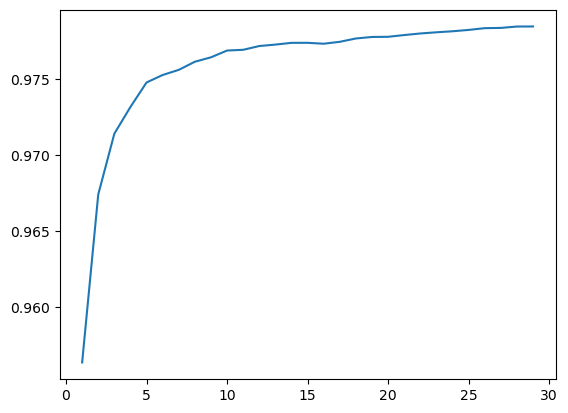

In [22]:
plt.plot(range(mi,ma),scorel)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 0.9774196307441987 23


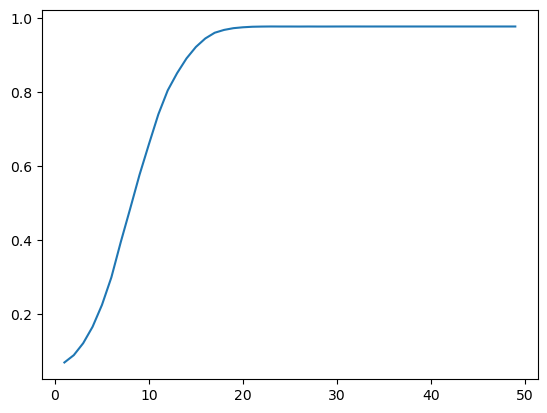

In [23]:
scorel = []
mi = 1
ma = 50
for i in range (mi,ma):
    print(i, end=' ')
    rfc = RandomForestRegressor(n_estimators=15
                                 ,n_jobs=-1
                                 ,random_state = 0
                                ,max_depth=i
                                )
    rfc = rfc.fit(x_train,y_train)
    score =rfc.score(x_test,y_test)
#     score = cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+mi)
plt.plot(range(mi,ma),scorel)
plt.show()

1 2 3 4 5 6 7 8 0.9785511977744521 7


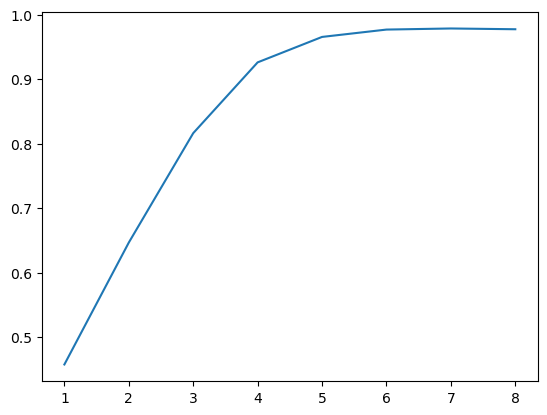

In [24]:
scorel = []
mi = 1
ma = 9
for i in range (mi,ma):
    print(i,end=' ')
    rfc = RandomForestRegressor(n_estimators=15
                                 ,random_state = 0
                                ,max_depth=27
                                ,max_features=i
                                )
    rfc = rfc.fit(x_train,y_train)
    score =rfc.score(x_test,y_test)
#     score = cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+mi)
plt.plot(range(mi,ma),scorel)
plt.show()

In [25]:
y_pred

array([[25.        ,  5.        ],
       [ 3.        , 27.        ],
       [21.42666667,  8.10666667],
       ...,
       [40.        ,  0.        ],
       [22.29444444,  7.70555556],
       [23.93333333,  6.06666667]])

In [26]:
y_test

,available_bike_stands,available_bikes
143402,25,5
38258,3,27
147060,17,13
54668,15,5
27248,1,19
...,...,...
55651,28,8
81489,25,5
63802,40,0
74061,24,6


In [27]:
df_whole

,number,datetime_rounded,available_bike_stands,available_bikes,feels_like,humidity,pressure,weather_main,wind_speed,day_of_week,hourly,weather_main_value,datetime_numeric
0,1,2023-03-05 17:10:00,1,29,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
1,3,2023-03-05 17:10:00,1,19,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
2,4,2023-03-05 17:10:00,0,20,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
3,5,2023-03-05 17:10:00,39,1,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
4,6,2023-03-05 17:10:00,3,17,279.64,71,1015,Clouds,4.63,6,17,1,1678036200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153194,107,2023-03-25 10:10:00,28,12,282.51,78,1002,Clouds,7.20,5,10,1,1679739000
153195,108,2023-03-25 10:10:00,26,9,282.51,78,1002,Clouds,7.20,5,10,1,1679739000
153196,30,2023-03-23 14:50:00,20,0,285.71,61,987,Clouds,12.86,3,14,1,1679583000
153197,42,2023-03-23 14:50:00,28,2,285.71,61,987,Clouds,12.86,3,14,1,1679583000


In [28]:
# Define the input features and target variables
input_features = ['feels_like', 'weather_main_value', 'wind_speed','humidity',
                  'pressure','day_of_week', 'hourly']

x_train = df_train[input_features]
y_train = df_train[['available_bike_stands', 'available_bikes']]

x_test = df_test[input_features]
y_test = df_test[['available_bike_stands', 'available_bikes']]

In [29]:
# create list for station model
rf_list = [0] * (len(df_whole['number'].unique())+10)

input_features = ['feels_like', 'weather_main_value', 'wind_speed','humidity',
                  'pressure','day_of_week', 'hourly']

# train for each station
for i in df_whole['number'].unique():
    print(i, end=' ')
    
    x_train = df_train[df_train['number'] == i][input_features]
    y_train = df_train[df_train['number'] == i][['available_bike_stands', 'available_bikes']]
        
    rf = RandomForestRegressor(
                                n_estimators=25
                                 ,random_state = 0
                                ,max_depth=27
                                ,max_features=6)
    rf.fit(x_train, y_train)
    
    rf_list[i] = rf
                

1 3 4 5 6 7 8 9 10 11 12 13 14 15 17 18 20 21 23 24 25 26 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 68 71 72 73 74 75 76 77 80 82 83 84 85 86 87 88 89 90 91 92 96 97 98 99 100 101 102 103 104 105 106 108 111 112 113 114 115 116 117 2 16 19 22 27 28 57 66 67 69 78 79 93 94 95 107 109 110 

In [30]:
len(df_whole['number'].unique())

114

In [38]:
mse_sum = 0
new_train_list = []
for i in df_whole['number'].unique():
    print(i, end=' ')
    
    x_test = df_test[df_test['number'] == i][input_features]                   
    y_test = df_test[df_test['number'] == i][['available_bike_stands', 'available_bikes']]
    
    # Make predictions on the test data
    y_pred = rf_list[i].predict(x_test)
#     print(y_pred.head(5))
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
#     print(y_pred.head(5))
    mse_sum += mse

    print('Mean squared error:', mse)
    if mse > 3:
        new_train_list += [i, ]
        
    feature_importances = pd.DataFrame(rf_list[i].feature_importances_,
       index=input_features, columns=['importance']).sort_values('importance', ascending=False)
    
    print(feature_importances)


1 Mean squared error: 3.220635503727599
                    importance
day_of_week           0.338830
hourly                0.293432
feels_like            0.111400
pressure              0.100518
wind_speed            0.100057
humidity              0.053644
weather_main_value    0.002119
3 Mean squared error: 1.0795348918377954
                    importance
feels_like            0.322897
hourly                0.178349
wind_speed            0.159518
pressure              0.143547
humidity              0.132952
day_of_week           0.038568
weather_main_value    0.024169
4 Mean squared error: 1.3310255908453197
                    importance
pressure              0.249128
hourly                0.204640
humidity              0.203411
feels_like            0.159666
wind_speed            0.132916
day_of_week           0.046876
weather_main_value    0.003363
5 Mean squared error: 6.382986166858554
                    importance
hourly                0.449360
feels_like            0.248851
p

38 Mean squared error: 1.6887790105469995
                    importance
day_of_week           0.345128
pressure              0.210458
humidity              0.180357
hourly                0.113965
feels_like            0.071613
wind_speed            0.056475
weather_main_value    0.022004
39 Mean squared error: 1.3498409893412517
                    importance
day_of_week           0.286664
pressure              0.249981
humidity              0.192243
hourly                0.088581
feels_like            0.085541
wind_speed            0.048646
weather_main_value    0.048344
40 Mean squared error: 1.7324601522645016
                    importance
pressure              0.373680
wind_speed            0.179514
hourly                0.149747
humidity              0.114894
feels_like            0.099884
day_of_week           0.075442
weather_main_value    0.006839
41 Mean squared error: 0.6299940814236011
                    importance
day_of_week           0.322973
feels_like            0.26

                    importance
wind_speed            0.425580
humidity              0.227897
hourly                0.127556
pressure              0.071340
day_of_week           0.063617
feels_like            0.052862
weather_main_value    0.031148
74 Mean squared error: 1.772131652292976
                    importance
pressure              0.438962
day_of_week           0.177122
hourly                0.122859
humidity              0.094911
feels_like            0.085658
wind_speed            0.077461
weather_main_value    0.003028
75 Mean squared error: 3.4800623241271627
                    importance
pressure              0.713632
humidity              0.142179
feels_like            0.058766
wind_speed            0.042042
hourly                0.022946
day_of_week           0.017309
weather_main_value    0.003127
76 Mean squared error: 4.850782745947054
                    importance
humidity              0.409082
hourly                0.164657
pressure              0.145192
wind_spe

113 Mean squared error: 1.1827281653086146
                    importance
humidity              0.306089
pressure              0.261260
feels_like            0.163648
hourly                0.156239
day_of_week           0.082495
wind_speed            0.029245
weather_main_value    0.001024
114 Mean squared error: 4.5134958355838055
                    importance
hourly                0.761136
humidity              0.099047
feels_like            0.048167
day_of_week           0.029236
weather_main_value    0.024834
pressure              0.018891
wind_speed            0.018689
115 Mean squared error: 1.2136650771428523
                    importance
humidity              0.387896
hourly                0.356383
feels_like            0.098085
day_of_week           0.076561
pressure              0.035279
wind_speed            0.026585
weather_main_value    0.019211
116 Mean squared error: 0.18602461607914852
                    importance
hourly                0.433200
day_of_week          

In [32]:
mse_sum / len(df_whole['number'].unique())

2.201010514193463

In [33]:
for i in new_train_list:
    print(i, end=' ')
    
    x_train = df_train[df_train['number'] == i][input_features]
    y_train = df_train[df_train['number'] == i][['available_bike_stands', 'available_bikes']]
        
    rf = RandomForestRegressor(n_estimators=50
                                 ,random_state = 0
                                ,max_depth=27
                                ,max_features=6)
    rf.fit(x_train, y_train)
    
    rf_list[i] = rf

for i in new_train_list:
    print(i, end=' ')
    
    x_test = df_test[df_test['number'] == i][input_features]                   
    y_test = df_test[df_test['number'] == i][['available_bike_stands', 'available_bikes']]
    
    # Make predictions on the test data
    y_pred = rf_list[i].predict(x_test)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print('Mean squared error:', mse)

1 5 14 20 32 34 42 49 58 60 65 68 72 75 76 86 92 97 98 101 114 117 69 93 107 109 1 Mean squared error: 3.220635503727599
5 Mean squared error: 6.382986166858554
14 Mean squared error: 3.2514270485341394
20 Mean squared error: 4.487631466822737
32 Mean squared error: 3.221410390476633
34 Mean squared error: 5.177778489943729
42 Mean squared error: 3.168845595457875
49 Mean squared error: 3.9368811123539613
58 Mean squared error: 3.440653543822903
60 Mean squared error: 4.754273384133221
65 Mean squared error: 6.791416803981779
68 Mean squared error: 3.4598464517751912
72 Mean squared error: 3.6197516611187255
75 Mean squared error: 3.4800623241271627
76 Mean squared error: 4.850782745947054
86 Mean squared error: 5.841914996694137
92 Mean squared error: 4.608128719129688
97 Mean squared error: 4.169746317928121
98 Mean squared error: 4.16876468207062
101 Mean squared error: 3.3728224287541435
114 Mean squared error: 4.5134958355838055
117 Mean squared error: 3.3144064423213306
69 Mean s

In [39]:
import pickle

for i in df_whole['number'].unique():
    with open('station_'+str(i)+'.pkl','wb') as handle:
        pickle.dump(rf_list[i], handle, pickle.HIGHEST_PROTOCOL)

In [40]:
# for test
y_pred = rf_list[75].predict([[278, 1, 9, 80, 993, 2, 2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:
y_pred

array([[32.407,  7.593]])